In [145]:
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [124]:
df = pd.read_csv('grouped_data.csv', index_col=0)
df.drop(['WasRainingDuringRaceAnyTime'], axis=1, inplace=True)
df = df.loc[df['lapTireChange'].str.count(':') <= 3]
df

,raceId,driverCode,teamName,startingGridPosition,position,positionDiff,circuitName,raceName,year,AirTemp,Humidity,TrackTemp,WindSpeed,lapTireChange
15,990,ALO,McLaren,13,7,6,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,"14: SOFT->MEDIUM, 39: MEDIUM->SUPERSOFT"
16,990,BOT,Mercedes,3,2,1,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,20: SUPERSOFT->MEDIUM
17,990,ERI,Sauber,17,9,8,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,23: SOFT->MEDIUM
18,990,GAS,Toro Rosso,5,4,1,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,"15: SUPERSOFT->SOFT, 34: SOFT->SUPERSOFT"
19,990,GRO,Haas F1 Team,16,13,3,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,"18: SUPERSOFT->SOFT, 30: SOFT->SUPERSOFT, 45: ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1073,SAI,Ferrari,5,3,2,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,19: SOFT->HARD
1341,1073,STR,Aston Martin,13,13,0,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,"21: MEDIUM->HARD, 52: HARD->SOFT"
1342,1073,TSU,AlphaTauri,8,4,4,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,"23: MEDIUM->HARD, 53: HARD->SOFT"
1343,1073,VER,Red Bull,1,1,0,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,"13: SOFT->HARD, 36: HARD->HARD, 53: HARD->SOFT"


In [125]:
df['firstCompound'] = df['lapTireChange'].str.split('->').str[0].str.split(':').str[1]
df['firstPitStop'] = df['lapTireChange'].str.split('->').str[0].str.split(':').str[0]
df['secondCompound'] = df['lapTireChange'].str.split('->').str[1].str.split(":").str[0].str.split(',').str[0]
df['secondPitStop'] = df['lapTireChange'].str.split('->').str[1].str.split(',').str[1].str.split(':').str[0]
df['thirdCompound'] = df['lapTireChange'].str.split('->').str[2].str.split(':').str[0].str.split(',').str[0]
df['thirdPitStop'] = df['lapTireChange'].str.split('->').str[2].str.split(',').str[1].str.split(':').str[0]
df['fourthCompound'] = df['lapTireChange'].str.split('->').str[3].str.split(',').str[0]
df.drop(['lapTireChange'], axis=1, inplace=True)
df

,raceId,driverCode,teamName,startingGridPosition,position,positionDiff,circuitName,raceName,year,AirTemp,Humidity,TrackTemp,WindSpeed,firstCompound,firstPitStop,secondCompound,secondPitStop,thirdCompound,thirdPitStop,fourthCompound
15,990,ALO,McLaren,13,7,6,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,SOFT,14,MEDIUM,39,SUPERSOFT,NaN,NaN
16,990,BOT,Mercedes,3,2,1,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,SUPERSOFT,20,MEDIUM,NaN,NaN,NaN,NaN
17,990,ERI,Sauber,17,9,8,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,SOFT,23,MEDIUM,NaN,NaN,NaN,NaN
18,990,GAS,Toro Rosso,5,4,1,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,SUPERSOFT,15,SOFT,34,SUPERSOFT,NaN,NaN
19,990,GRO,Haas F1 Team,16,13,3,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,SUPERSOFT,18,SOFT,30,SUPERSOFT,45,SUPERSOFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1073,SAI,Ferrari,5,3,2,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,SOFT,19,HARD,NaN,NaN,NaN,NaN
1341,1073,STR,Aston Martin,13,13,0,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,MEDIUM,21,HARD,52,SOFT,NaN,NaN
1342,1073,TSU,AlphaTauri,8,4,4,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,MEDIUM,23,HARD,53,SOFT,NaN,NaN
1343,1073,VER,Red Bull,1,1,0,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,SOFT,13,HARD,36,HARD,53,SOFT


In [126]:
df[['driverCode', 'teamName', 'circuitName', 'raceName', 'firstCompound', 'firstPitStop', 'secondCompound', 'secondPitStop', 'thirdPitStop', 'thirdCompound', 'fourthCompound']] = df[['driverCode', 'teamName', 'circuitName', 'raceName', 'firstCompound', 'firstPitStop', 'secondCompound', 'secondPitStop', 'thirdPitStop', 'thirdCompound', 'fourthCompound']].apply(lambda col: pd.factorize(col)[0])
df

,raceId,driverCode,teamName,startingGridPosition,position,positionDiff,circuitName,raceName,year,AirTemp,Humidity,TrackTemp,WindSpeed,firstCompound,firstPitStop,secondCompound,secondPitStop,thirdCompound,thirdPitStop,fourthCompound
15,990,0,0,13,7,6,0,0,2018,28.0,46.4,33.5,1.5,0,0,0,0,0,-1,-1
16,990,1,1,3,2,1,0,0,2018,28.0,46.4,33.5,1.5,1,1,0,-1,-1,-1,-1
17,990,2,2,17,9,8,0,0,2018,28.0,46.4,33.5,1.5,0,2,0,-1,-1,-1,-1
18,990,3,3,5,4,1,0,0,2018,28.0,46.4,33.5,1.5,1,3,1,1,0,-1,-1
19,990,4,4,16,13,3,0,0,2018,28.0,46.4,33.5,1.5,1,4,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1073,12,8,5,3,2,17,17,2021,25.6,53.5,33.0,0.7,0,19,4,-1,-1,-1,-1
1341,1073,14,14,13,13,0,17,17,2021,25.6,53.5,33.0,0.7,5,27,4,45,1,-1,-1
1342,1073,30,12,8,4,4,17,17,2021,25.6,53.5,33.0,0.7,5,2,4,42,1,-1,-1
1343,1073,19,9,1,1,0,17,17,2021,25.6,53.5,33.0,0.7,0,7,4,24,5,8,2


In [127]:
df.describe()

,raceId,driverCode,teamName,startingGridPosition,position,positionDiff,circuitName,raceName,year,AirTemp,Humidity,TrackTemp,WindSpeed,firstCompound,firstPitStop,secondCompound,secondPitStop,thirdCompound,thirdPitStop,fourthCompound
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.00000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.00000,951.000000,951.000000,951.000000
mean,1031.828601,13.761304,6.289169,10.033649,9.186120,0.847529,9.532072,11.22082,2019.570978,23.635121,51.307676,37.952050,1.417666,2.921136,16.783386,2.288118,10.77918,0.702419,0.787592,-0.523659
std,22.976213,8.031570,4.039473,5.796453,5.107688,4.093241,6.790611,7.93577,1.070641,4.405347,14.703399,9.109017,0.981301,2.463862,12.204976,1.988137,16.34038,2.075619,6.214338,1.422088
min,990.000000,0.000000,0.000000,0.000000,1.000000,-18.000000,0.000000,0.00000,2018.000000,15.500000,16.900000,18.200000,0.000000,0.000000,0.000000,0.000000,-1.00000,-1.000000,-1.000000,-1.000000
25%,1013.000000,7.000000,3.000000,5.000000,5.000000,-1.000000,4.000000,4.00000,2019.000000,20.400000,40.000000,30.600000,0.700000,0.000000,7.000000,0.000000,-1.00000,-1.000000,-1.000000,-1.000000
50%,1030.000000,14.000000,7.000000,10.000000,9.000000,1.000000,9.000000,10.00000,2019.000000,23.200000,53.500000,37.300000,1.300000,4.000000,13.000000,3.000000,0.00000,0.000000,-1.000000,-1.000000
75%,1053.000000,20.000000,9.000000,15.000000,13.000000,3.000000,15.000000,17.00000,2021.000000,27.600000,60.400000,43.900000,2.100000,5.000000,26.000000,4.000000,21.00000,2.000000,-1.000000,-1.000000
max,1073.000000,31.000000,14.000000,20.000000,20.000000,17.000000,24.000000,29.00000,2021.000000,34.200000,95.500000,57.000000,5.300000,7.000000,52.000000,8.000000,58.00000,7.000000,37.000000,6.000000


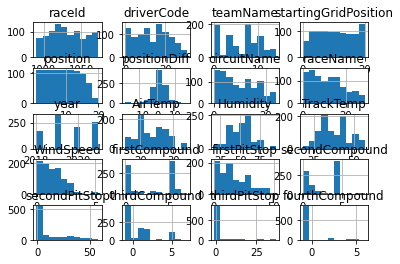

In [128]:
df.hist()
pyplot.show()

In [135]:
array = df.values
X = array[:,0:13]
y = array[:,13:]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
y

array([[ 0.,  0.,  0., ...,  0., -1., -1.],
       [ 1.,  1.,  0., ..., -1., -1., -1.],
       [ 0.,  2.,  0., ..., -1., -1., -1.],
       ...,
       [ 5.,  2.,  4., ...,  1., -1., -1.],
       [ 0.,  7.,  4., ...,  5.,  8.,  2.],
       [ 5.,  2.,  4., ..., -1., -1., -1.]])

In [141]:
model = KNeighborsRegressor()
model.fit(X, y)
predictions = model.predict(X_validation)
predictions

array([[ 0. , 10. ,  0.8, ...,  1.2, -1. , -1. ],
       [ 1.2, 32. ,  1.6, ..., -0.6, -1. , -1. ],
       [ 3. , 14.2,  2.4, ...,  0.2, -1. , -1. ],
       ...,
       [ 7. , 29. ,  8. , ..., -1. , -1. , -1. ],
       [ 1.4,  3. ,  1.2, ..., -0.2, -1. , -1. ],
       [ 5.2, 25.4,  3.2, ..., -0.6, -1. , -1. ]])

In [146]:


models = [KNeighborsRegressor(), LinearRegression(), DecisionTreeRegressor(), MultiOutputRegressor(LinearSVR())]
for model in models:
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    n_scores = absolute(n_scores)
    print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 3.375 (0.205)
MAE: 4.595 (0.160)
MAE: 3.911 (0.276)
MAE: 6.077 (1.244)
